In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Image Data Generation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 343 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [3]:
# Convolutional Neural Network (CNN)
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(x=training_set, validation_data=test_set, epochs=30)


Epoch 1/30
11/11 [==============================] - 3s 240ms/step - loss: 0.6664 - accuracy: 0.5598 - val_loss: 0.5374 - val_accuracy: 0.7857
Epoch 2/30
11/11 [==============================] - 2s 203ms/step - loss: 0.5219 - accuracy: 0.7872 - val_loss: 0.3763 - val_accuracy: 0.8929
Epoch 3/30
11/11 [==============================] - 2s 209ms/step - loss: 0.4322 - accuracy: 0.8222 - val_loss: 0.2530 - val_accuracy: 0.8750
Epoch 4/30
11/11 [==============================] - 2s 206ms/step - loss: 0.3164 - accuracy: 0.8659 - val_loss: 0.0964 - val_accuracy: 0.9821
Epoch 5/30
11/11 [==============================] - 2s 212ms/step - loss: 0.2450 - accuracy: 0.9242 - val_loss: 0.0726 - val_accuracy: 0.9732
Epoch 6/30
11/11 [==============================] - 2s 211ms/step - loss: 0.2494 - accuracy: 0.9213 - val_loss: 0.0637 - val_accuracy: 0.9732
Epoch 7/30
11/11 [==============================] - 2s 206ms/step - loss: 0.1962 - accuracy: 0.9213 - val_loss: 0.0421 - val_accuracy: 0.9911
Epoch 

In [4]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(training_set[0][0].reshape(training_set[0][0].shape[0], -1), training_set[0][1])


RandomForestClassifier(random_state=42)

In [5]:
# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)
svm_classifier.fit(training_set[0][0].reshape(training_set[0][0].shape[0], -1), training_set[0][1])

SVC(kernel='linear', probability=True, random_state=42)

In [6]:
# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(training_set[0][0].reshape(training_set[0][0].shape[0], -1), training_set[0][1])

KNeighborsClassifier()

In [7]:
# Predictions
cnn_predictions = cnn.predict(test_set, verbose=0)
rf_predictions = rf_classifier.predict_proba(test_set[0][0].reshape(test_set[0][0].shape[0], -1))[:, 1]
svm_predictions = svm_classifier.predict_proba(test_set[0][0].reshape(test_set[0][0].shape[0], -1))[:, 1]
knn_predictions = knn_classifier.predict_proba(test_set[0][0].reshape(test_set[0][0].shape[0], -1))[:, 1]

In [8]:
# Accuracy comparison
cnn_accuracy = cnn.evaluate(test_set)[1]
rf_accuracy = rf_classifier.score(test_set[0][0].reshape(test_set[0][0].shape[0], -1), test_set[0][1])
svm_accuracy = svm_classifier.score(test_set[0][0].reshape(test_set[0][0].shape[0], -1), test_set[0][1])
knn_accuracy = knn_classifier.score(test_set[0][0].reshape(test_set[0][0].shape[0], -1), test_set[0][1])

4/4 [==============================] - 1s 132ms/step - loss: 0.1880 - accuracy: 0.9643


In [9]:
# ROC Curve for CNN
fpr_cnn, tpr_cnn, _ = roc_curve(test_set.classes, cnn_predictions)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

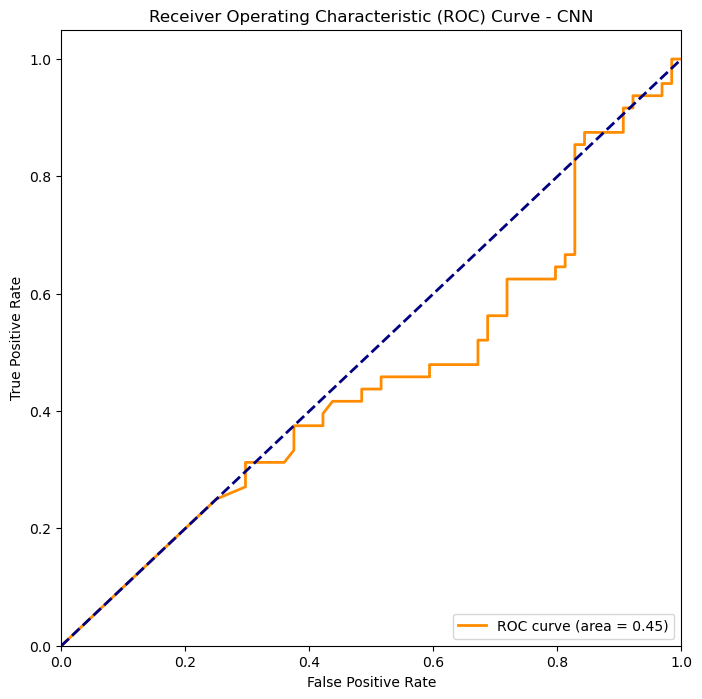

In [10]:
# Plot ROC Curve for CNN
plt.figure(figsize=(8, 8))
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - CNN')
plt.legend(loc="lower right")
plt.show()

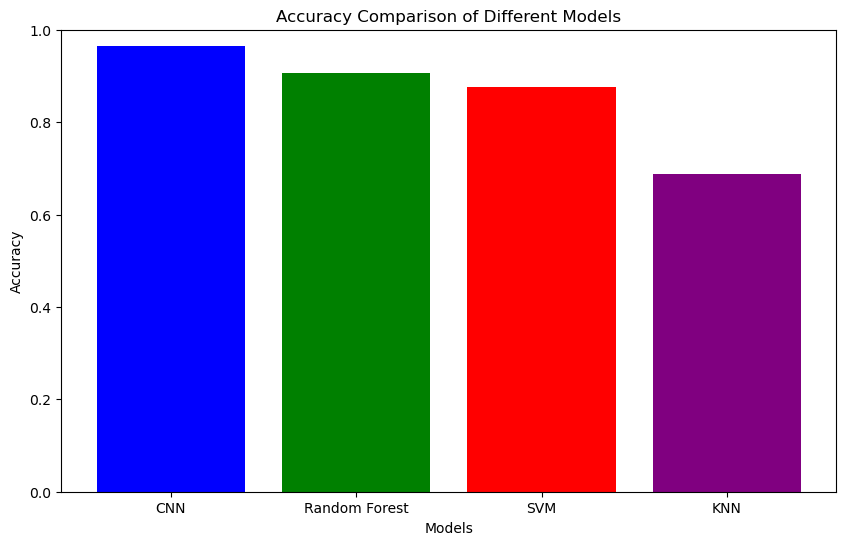

In [11]:
# Accuracy Comparison Graph
models = ['CNN', 'Random Forest', 'SVM', 'KNN']
accuracies = [cnn_accuracy, rf_accuracy, svm_accuracy, knn_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

In [12]:
#Prediction using CNN
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cancer (4).png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Normal'
else:
  prediction = 'Cancer'

print(prediction)


1/1 [==============================] - 0s 36ms/step
Normal
